## Find distinguishing properties of modalities

In [2]:
%load_ext autoreload
%autoreload 2

import modish
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

sns.set(style='ticks', context='talk', rc={'font.sans-serif':'Arial', 'pdf.fonttype': 42})

%matplotlib inline



import flotilla

flotilla_dir = '/projects/ps-yeolab/obotvinnik/flotilla_projects'


study = flotilla.embark('singlecell_pnm_figure2_modalities_bayesian', flotilla_dir=flotilla_dir)

not_outliers = study.splicing.singles.index.difference(study.splicing.outliers.index)

/home/obotvinnik/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:810: UserWarning: Found matplotlib configuration in ~/.matplotlib/. To conform with the XDG base directory standard, this configuration location has been deprecated on Linux, and the new location is now /home/obotvinnik/.config/matplotlib/. Please move your configuration there to ensure that matplotlib will continue to find it in the future.
  _get_xdg_config_dir())
/home/obotvinnik/workspace-git/flotilla/flotilla/__init__.py:55: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  load_species_data=load_species_data)


2016-01-29 15:10:10	Reading datapackage from /projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnm_figure2_modalities_bayesian/datapackage.json
2016-01-29 15:10:10	Parsing datapackage to create a Study object
2016-01-29 15:10:50	Initializing Study
2016-01-29 15:10:50	Initializing Predictor configuration manager for Study
2016-01-29 15:10:50	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2016-01-29 15:10:50	Added ExtraTreesClassifier to default predictors
2016-01-29 15:10:50	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2016-01-29 15:10:50	Added ExtraTreesRegressor to default predictors
2016-01-29 15:10:50	Predictor GradientBoostingClassifier is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
2016-01-29 15:10:50	Added GradientBoostingClassifier to default predictors
2016-01-29 15:10:50	Predictor GradientBoostingRegressor is of type <class 'sklearn.

In [3]:
folder = '/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure2_modalities/bayesian'
figure_folder = '{}/pyrimidine_content'.format(folder)
! mkdir $figure_folder

mkdir: cannot create directory `/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure2_modalities/bayesian/pyrimidine_content': File exists


In [4]:
csv_folder = '/projects/ps-yeolab/obotvinnik/singlecell_pnms/csvs_for_paper'

In [5]:
ls $csv_folder

conservation/
constitutive_downstream400_pyrimidine_content.csv
constitutive_exons.bed
constitutive_feature_data.csv
constitutive_upstream400_pyrimidine_content.csv
exon2_downstream400_pyrimidine_content.csv
exon2_upstream400_pyrimidine_content.csv
expression.csv
expression_stressed.csv
junction_exon_triples.csv
mapping_stats.csv
mapping_stats_stressed.csv
metadata.csv
metadata_stressed.csv
mutually_exclusive_exon_consolidated_events.csv
mutually_exclusive_exons_psi.csv
mxe_events_with_stressed.csv
nucleotide_content/
outrigger_singlecell.sh
outrigger_singlecell.sh.err
outrigger_singlecell.sh.out
outrigger_singlecell.sh~
psi.csv
psi3.csv
psi3_stressed.csv
psi5.csv
psi5_psi3_combined.csv
psi5_psi3_combined.hdf
psi5_psi3_combined_metadata.csv
psi5_psi3_combined_metadata.hdf
psi5_stressed.csv
psi_constitutively0.csv
psi_constitutively1.csv
psi_unfiltered.csv
se_events_with_stressed.csv
sj_metadata.csv
sj_raw.csv
skipped_exon_consolidated_events.csv
skipped_exon_psi_from_junctions.csv
spli

In [20]:
import six

In [60]:
nucleotides = 'ACGT'
contexts = 'upstream', 'downstream'
exon_types = 'exon2', 'constitutive'

alternative_dfs = []
constitutive_dfs = []

for context in contexts:
    for exon_type in exon_types:
        six.print_(context, exon_type)
        csv = '{}/{}_{}400_pyrimidine_content.csv'.format(csv_folder, exon_type, context)
        df = pd.read_csv(csv, index_col=0)
        df = df * 100
        six.print_('\t', df.shape)
        tidy = df.unstack().reset_index()
        tidy = tidy.rename(
            columns={'level_0': 'window_relative_to_exon', 'level_1': 'event_name', 0:'Pyrimidine Percentage'})
        tidy['window_relative_to_exon'] = tidy['window_relative_to_exon'].astype(int)
#             if context == 'upstream':
#                 tidy['window_relative_to_genome'] = np.abs(tidy['window_relative_to_exon'] - 39)
#             else:
#                 tidy['window_relative_to_genome'] = tidy['window_relative_to_exon'].copy()
        tidy['Region'] = context.title()
        tidy['exon_type'] = exon_type
        if exon_type == 'exon2':
            alternative_dfs.append(tidy)
        else:
            constitutive_dfs.append(tidy)
alternative_df = pd.concat(alternative_dfs)
constitutive_df = pd.concat(constitutive_dfs)

print(alternative_df.shape)
alternative_df.head()

upstream exon2
	 (53751, 40)
upstream constitutive
	 (1449, 40)
downstream exon2
	 (53751, 40)
downstream constitutive
	 (1449, 40)
(4300080, 5)


,window_relative_to_exon,event_name,Pyrimidine Percentage,Region,exon_type
0,0,exon:chr10:100190328-100190427:-@exon:chr10:10...,60,Upstream,exon2
1,0,exon:chr10:100193697-100193848:-@exon:chr10:10...,60,Upstream,exon2
2,0,exon:chr10:100195392-100195529:-@exon:chr10:10...,50,Upstream,exon2
3,0,exon:chr10:101165513-101165617:-@exon:chr10:10...,70,Upstream,exon2
4,0,exon:chr10:101419263-101419345:+@exon:chr10:10...,70,Upstream,exon2


In [61]:
alternative_modalities = study.supplemental.modalities_tidy.merge(alternative_df, 
                                                      left_on='event_name', right_on='event_name')
alternative_modalities.head()

,phenotype,event_name,modality,window_relative_to_exon,Pyrimidine Percentage,Region,exon_type
0,MN,exon:chr10:102114184-102114389:+@exon:chr10:10...,~1,0,40,Upstream,exon2
1,MN,exon:chr10:102114184-102114389:+@exon:chr10:10...,~1,1,60,Upstream,exon2
2,MN,exon:chr10:102114184-102114389:+@exon:chr10:10...,~1,2,60,Upstream,exon2
3,MN,exon:chr10:102114184-102114389:+@exon:chr10:10...,~1,3,90,Upstream,exon2
4,MN,exon:chr10:102114184-102114389:+@exon:chr10:10...,~1,4,20,Upstream,exon2


In [62]:
constitutive_df.shape

(115920, 5)

In [63]:
constitutive_df['modality'] = 'constitutive'

constitutive_phenotypes = []

for phenotype in study.phenotype_order:
    constitutive_df['phenotype'] = phenotype
    constitutive_phenotypes.append(constitutive_df.copy())
constitutive_phenotype = pd.concat(constitutive_phenotypes)
constitutive_phenotype.head()

,window_relative_to_exon,event_name,Pyrimidine Percentage,Region,exon_type,modality,phenotype
0,0,exon:chr10:101162337-101162479:-,60,Upstream,constitutive,constitutive,iPSC
1,0,exon:chr10:101483713-101483880:-,40,Upstream,constitutive,constitutive,iPSC
2,0,exon:chr10:101489310-101489491:-,60,Upstream,constitutive,constitutive,iPSC
3,0,exon:chr10:104183414-104183474:-,60,Upstream,constitutive,constitutive,iPSC
4,0,exon:chr10:104245366-104245490:-,70,Upstream,constitutive,constitutive,iPSC


In [64]:
constitutive_phenotype.shape

(347760, 7)

In [65]:
pyrimidine_content_all = pd.concat([constitutive_phenotype, alternative_modalities])
pyrimidine_content_all.head()

,Pyrimidine Percentage,Region,event_name,exon_type,modality,phenotype,window_relative_to_exon
0,60,Upstream,exon:chr10:101162337-101162479:-,constitutive,constitutive,iPSC,0
1,40,Upstream,exon:chr10:101483713-101483880:-,constitutive,constitutive,iPSC,0
2,60,Upstream,exon:chr10:101489310-101489491:-,constitutive,constitutive,iPSC,0
3,60,Upstream,exon:chr10:104183414-104183474:-,constitutive,constitutive,iPSC,0
4,70,Upstream,exon:chr10:104245366-104245490:-,constitutive,constitutive,iPSC,0


In [66]:
pyrimidine_content_all.groupby(['exon_type', 'modality', 'Region', 'phenotype']).size()

exon_type     modality      Region      phenotype
constitutive  constitutive  Downstream  MN            57960
                                        NPC           57960
                                        iPSC          57960
                            Upstream    MN            57960
                                        NPC           57960
                                        iPSC          57960
exon2         bimodal       Downstream  MN             8400
                                        NPC           15200
                                        iPSC          28600
                            Upstream    MN             8400
                                        NPC           15200
                                        iPSC          28600
              multimodal    Downstream  NPC              40
                                        iPSC            560
                            Upstream    NPC              40
                                        iPSC      

In [67]:
from anchor import MODALITY_ORDER, MODALITY_PALETTE, MODALITY_TO_COLOR

In [68]:
MODALITY_TO_COLOR['constitutive'] = 'k'

In [69]:
pyrimidine_content_all.head()

,Pyrimidine Percentage,Region,event_name,exon_type,modality,phenotype,window_relative_to_exon
0,60,Upstream,exon:chr10:101162337-101162479:-,constitutive,constitutive,iPSC,0
1,40,Upstream,exon:chr10:101483713-101483880:-,constitutive,constitutive,iPSC,0
2,60,Upstream,exon:chr10:101489310-101489491:-,constitutive,constitutive,iPSC,0
3,60,Upstream,exon:chr10:104183414-104183474:-,constitutive,constitutive,iPSC,0
4,70,Upstream,exon:chr10:104245366-104245490:-,constitutive,constitutive,iPSC,0


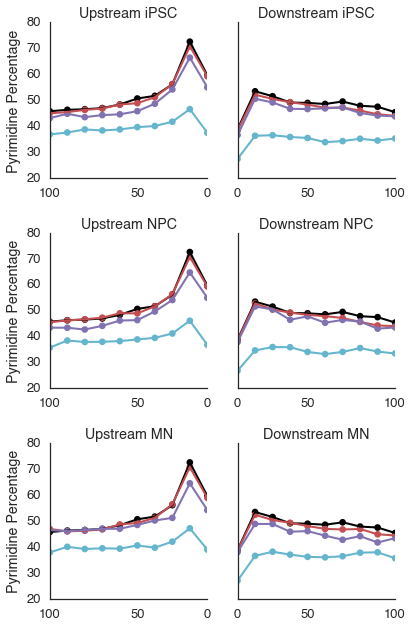

In [70]:
modality_order = ['constitutive', '~1', '~0', 'bimodal']
modality_palette = [MODALITY_TO_COLOR[x] for x in modality_order]

g = sns.FacetGrid(pyrimidine_content_all, hue='modality', row='phenotype', col='Region', 
                  palette=modality_palette, hue_order=modality_order, row_order=study.phenotype_order,
                 col_order=['Upstream', 'Downstream'], sharex=False)

g.map(sns.pointplot, 'window_relative_to_exon', 'Pyrimidine Percentage', scale=0.5, dodge=True, ci=None)
g.set_titles('{col_name} {row_name}')
for ax in g.axes.flat:
    if ax.is_first_col():
        ax.invert_xaxis()
g.set(xlabel='')
g.set(xticks=[0, 19, 39], xticklabels=[0, 200, 400])
g.fig.tight_layout()
g.savefig('{}/intron_window_pyrimidine_content.pdf'.format(figure_folder))

# Zoom in on first 100nt
g.set(xlim=(0, 9), xticks=[0, 4, 9], xticklabels=[0, 50, 100])
for ax in g.axes.flat:
    if ax.is_first_col():
        ax.invert_xaxis()
g.savefig('{}/intron_window_pyrimidine_content_zoom100nt.pdf'.format(figure_folder))
